In [2]:
clf_names = ["CART", "EBM", "GNB", "LR", "LR_l2", "DL"]
dataset_names = ['breast', 'campus', 'churn', 'climate',
            'compas', 'diabetes', 'german', 'heart',
            'adult', 'student', 'bank', 'credit']

In [3]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
def plot_losses(delimiter, loss_df):
    plt.figure(figsize=(13, 10))
    plt.plot(loss_df[:delimiter])
    plt.xlabel("Feature numbers")
    plt.ylabel("Normalized loss")
    plt.legend(loss_df.columns)
    plt.grid(True)
    plt.show()


def NormalizeData(data_avg):
    first = data_avg[0] 
    last = data_avg[data_avg.argmin()]
    return (np.subtract(data_avg, last) / np.subtract(first, last))*100

def calculate_losses(dataset_id):
    features_n = len(pd.read_csv(f"../test_results/feature_density/{clf_names[0]}_{dataset_names[dataset_id]}_{0}.csv"))
    fold_n = 10 
    clf_n = len(clf_names)
    results = np.zeros(shape=(fold_n, features_n))
    norm_results = np.zeros(shape=(clf_n, features_n))

    for clf_id in range(len(clf_names)):
        
        for i in range(fold_n):
            result_df= pd.read_csv(f"../test_results/feature_density/{clf_names[clf_id]}_{dataset_names[dataset_id]}_{i}.csv")
            results[i] = result_df["2"]
        
        result_df = pd.DataFrame(results)
        results_avg = result_df.mean()
        result_normalized = NormalizeData(results_avg)
        norm_results[clf_id] = result_normalized
    
    dict_results = {
        "CART": norm_results[0],
        "EBM": norm_results[1],
        "GNB": norm_results[2],
        "LR": norm_results[3],
        "LR_l2": norm_results[4],
        "DL": norm_results[5]
    }

    return dict_results

from numpy import trapz
def calculate_loss_auc(result_norm_df, delimiter):
    auc_losses = np.zeros(len(clf_names))

    for clf_id, clf in enumerate(clf_names):
        area = trapz(result_norm_df[clf][:delimiter])
        auc_losses[clf_id] = area/delimiter #divide beetwen number of features
    
    dict_auc_losses = {
            "CART": auc_losses[0],
            "EBM": auc_losses[1],
            "GNB": auc_losses[2],
            "LR": auc_losses[3],
            "LR_l2": auc_losses[4],
            "DL": auc_losses[5]
        }
    return dict_auc_losses

    

## 1. Breast Dataset

In [141]:
breast_data_results = calculate_losses(0)
breast_df_results = pd.DataFrame(breast_data_results)

In [142]:
breast_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000
1,42.686359,5.250772e+01,42.838986,53.090229,42.804584,100.000000
2,17.083186,3.217521e+01,19.669002,26.503228,19.027381,6.080975
3,8.563285,1.694865e+01,14.322112,9.354078,11.082785,1.520250
4,3.694807,1.018126e+01,10.725649,4.677021,9.499536,1.013496
5,3.694807,8.489429e+00,5.346891,4.677021,7.916249,0.506754
6,3.673072,3.383671e+00,3.564594,4.677021,6.332999,0.506754
7,2.455960,1.691836e+00,3.564594,1.559007,3.166500,1.013508
8,1.238847,0.000000e+00,3.564594,1.559007,3.166500,0.506754
9,2.434282,0.000000e+00,3.564594,1.559007,3.166500,0.000000


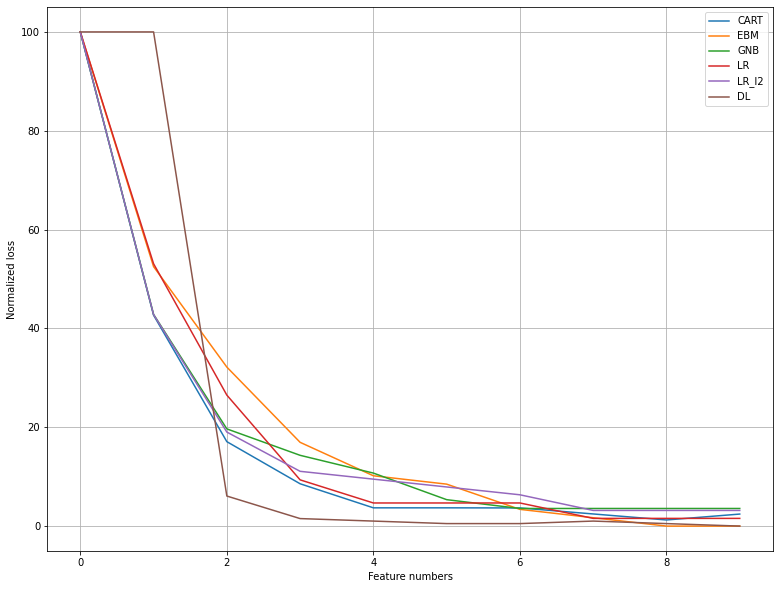

In [143]:
plot_losses(10, breast_df_results)

In [144]:
breast_auc_loss = calculate_loss_auc(breast_df_results, delimiter=10)
breast_auc_loss

{'CART': 13.430746344241342,
 'EBM': 17.53777709141698,
 'GNB': 15.53787181203592,
 'LR': 15.687611619206184,
 'LR_l2': 15.457978374480984,
 'DL': 16.11484897353979}

## 2. Campus Dataset

In [4]:
campus_data_results = calculate_losses(1)
campus_df_results = pd.DataFrame(campus_data_results)
campus_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,32.895678,33.859564,24.668786,27.007085,28.532880,100.000000
2,4.439984,16.929719,14.155608,11.496290,15.205657,90.322603
3,0.000000,7.543939,10.595960,5.748167,11.359510,20.737279
4,8.778816,5.701836,3.642264,3.740917,11.448910,11.059882
5,13.117794,1.929954,3.559607,1.824906,9.481159,0.460594
6,2.421881,3.772014,0.000000,3.740917,5.545610,0.460594
7,0.201965,1.842192,5.380635,1.824817,5.635099,0.460828
8,2.220066,0.000000,8.691863,0.000000,0.000000,0.000000
9,8.678107,7.543764,7.036230,7.846479,3.846060,0.000000


In [5]:
campus_df_results[campus_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,NaN,0.0,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0


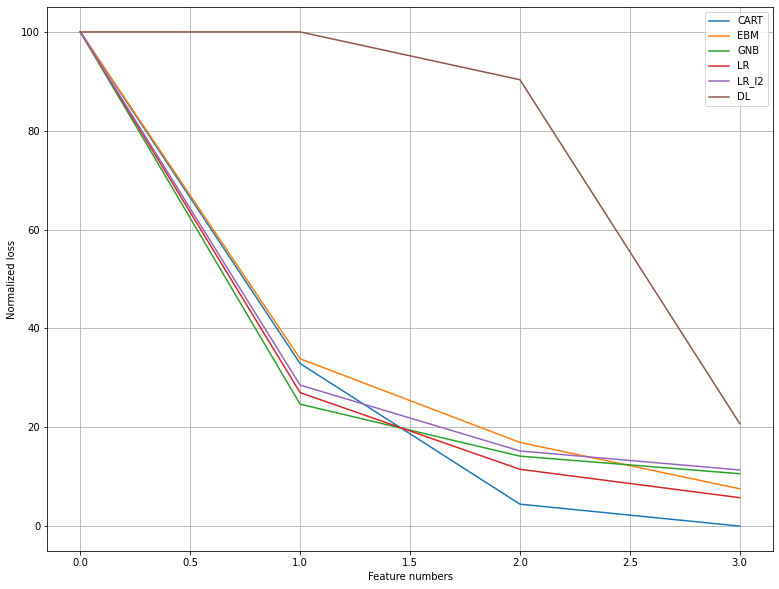

In [6]:
plot_losses(4, campus_df_results)

In [7]:
campus_auc_loss = calculate_loss_auc(campus_df_results, delimiter=4)
campus_auc_loss

{'CART': 21.833915685384092,
 'EBM': 26.14031307294057,
 'GNB': 23.530593419396805,
 'LR': 22.84436487631805,
 'LR_l2': 24.85457292557233,
 'DL': 62.67281065431724}

## 3. Churn Dataset

In [8]:
churn_data_results = calculate_losses(2)
churn_df_results = pd.DataFrame(churn_data_results)
churn_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,59.936231,68.220315,25.947968,100.000000,100.000000,100.000000
2,30.366484,39.266303,25.314983,100.000000,100.000000,46.780472
3,7.631212,16.808037,24.365572,97.841916,97.857333,37.769723
4,0.000000,9.604661,23.732580,81.294614,81.428241,16.308716
5,10.016191,4.237407,23.099610,39.567757,39.285127,16.308716
6,32.433312,0.000000,26.897145,17.984737,19.284945,17.381695
7,78.540341,0.141270,28.163034,3.596301,3.570660,17.811299
8,89.510663,1.271272,37.658832,0.000000,0.000000,16.308820
9,86.489885,2.542485,0.000000,9.353584,11.429779,10.729383


In [9]:
churn_df_results[churn_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,0.0,0.0,NaN
9,NaN,NaN,0.0,NaN,NaN,NaN


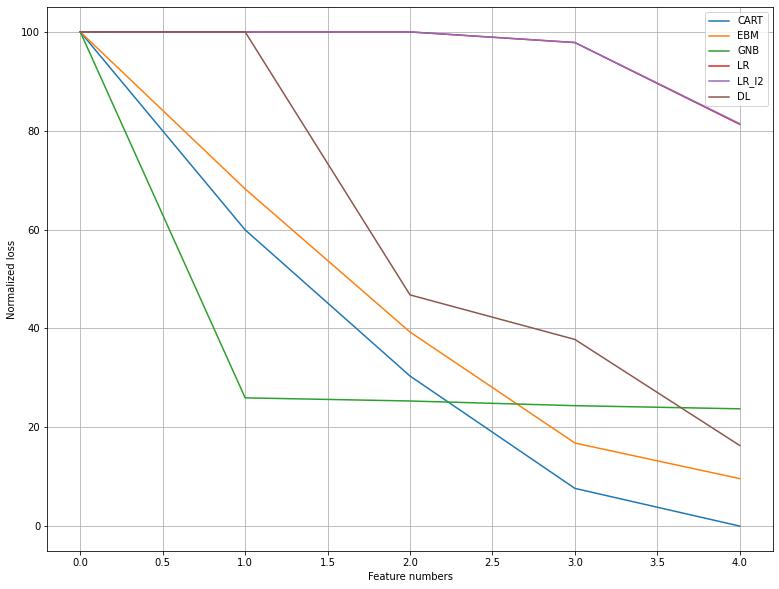

In [10]:
plot_losses(5, churn_df_results)

In [11]:
churn_auc_loss = calculate_loss_auc(churn_df_results, delimiter=5)
churn_auc_loss

{'CART': 29.58678545198983,
 'EBM': 35.81939719188187,
 'GNB': 27.498962589129935,
 'LR': 77.69784461442035,
 'LR_l2': 77.71429067532583,
 'DL': 48.54091042214337}

## 4. Climate dataset

In [12]:
climate_data_results = calculate_losses(3)
climate_df_results = pd.DataFrame(climate_data_results)
climate_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,41.666948,100.000000,100.000000,100.000000,100.000000,100.000000
2,27.083432,59.259088,58.620370,57.575607,57.575617,66.666667
3,29.166598,25.925926,27.586127,33.333427,42.424172,0.000000
4,10.416653,18.518433,17.241379,30.303058,27.272727,0.000000
5,0.000000,14.814729,6.896552,15.151634,21.212121,0.000000
6,4.166671,3.703618,3.448276,12.121335,15.151515,0.000000
7,10.416653,0.000000,3.448276,15.151494,12.121212,0.000000
8,4.166526,7.407322,3.448276,9.090966,12.121212,0.000000
9,6.249885,7.407322,3.448276,6.060598,9.090909,0.000000


In [13]:
climate_df_results[climate_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0
5,0.0,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,0.0,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0


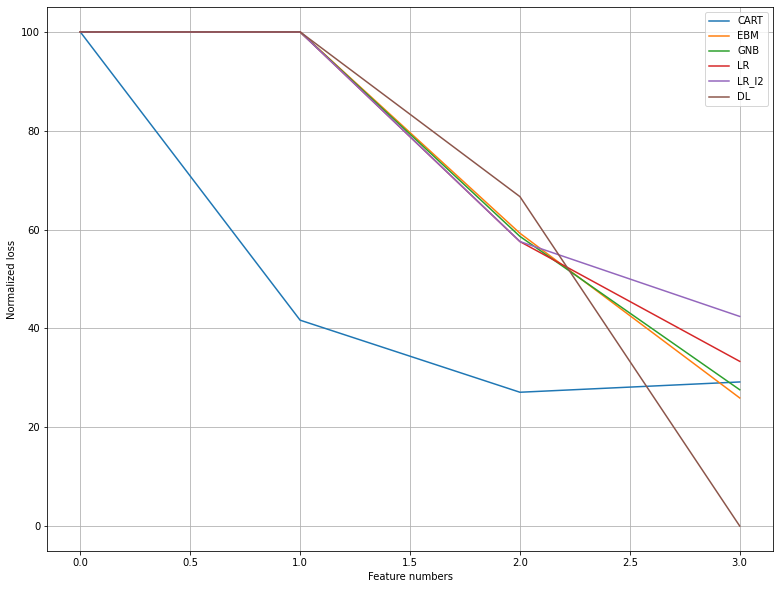

In [14]:
plot_losses(4, climate_df_results)

In [15]:
climate_auc_loss = calculate_loss_auc(climate_df_results, delimiter=4)
climate_auc_loss

{'CART': 33.333419745682164,
 'EBM': 55.55551268485029,
 'GNB': 55.603358469126064,
 'LR': 56.06058001934643,
 'LR_l2': 57.19692585193024,
 'DL': 54.16666666666663}

## 5.Compas dataset

In [16]:
compas_data_results = calculate_losses(4)
compas_df_results = pd.DataFrame(compas_data_results)
compas_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,97.531046,100.000000,90.011433,100.000000,100.000000,100.000000
2,81.487443,100.000000,46.680473,100.000000,100.000000,94.804089
3,21.605239,43.114562,0.000000,74.199301,74.199301,38.318375
4,11.111336,23.742582,3.338825,36.285845,36.285845,20.133389
5,6.789702,11.868675,20.006888,28.219197,28.219197,19.484046
6,0.000000,0.622954,15.005273,20.959622,20.959622,9.093784
7,8.645707,0.618993,43.381320,19.346110,19.346110,5.196317
8,18.522923,0.000000,91.684249,4.028167,4.028167,3.246908
9,23.468298,8.745888,93.372762,0.000000,0.000000,0.000000


In [17]:
compas_df_results[compas_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,0.0,0.0


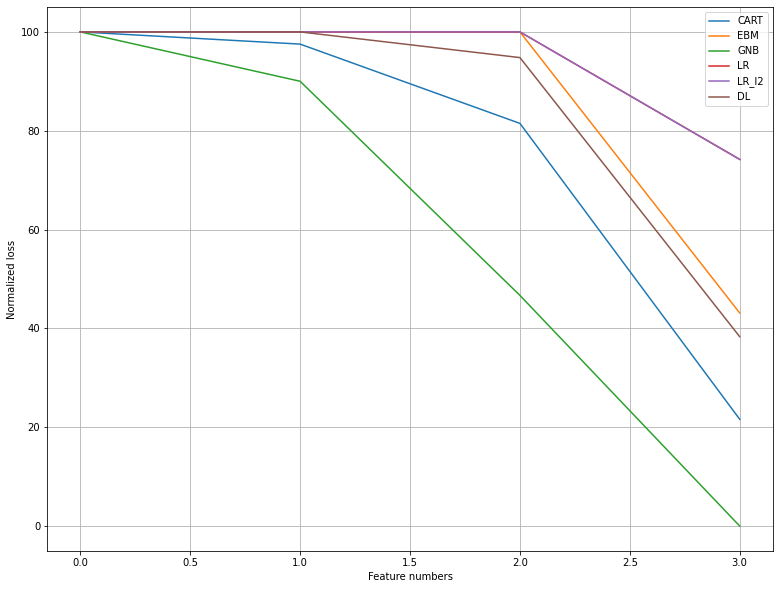

In [18]:
plot_losses(4, compas_df_results)

In [19]:
compas_auc_loss = calculate_loss_auc(compas_df_results, delimiter=4)
compas_auc_loss

{'CART': 59.95527698342742,
 'EBM': 67.88932023534991,
 'GNB': 46.67297665436293,
 'LR': 71.77491262125389,
 'LR_l2': 71.77491262125389,
 'DL': 65.9908191224209}

## 6. Diabetes dataset

In [20]:
diabetes_data_results = calculate_losses(5)
diabetes_df_results = pd.DataFrame(diabetes_data_results)
diabetes_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,50.708130,31.658635,32.025865,33.701839,33.711007,100.000000
2,44.091483,7.891846,12.568265,8.380540,9.469947,35.326384
3,42.544558,0.960375,3.832884,0.000000,0.000000,9.182067
4,40.847678,2.959508,0.929513,0.000000,1.062950,0.000000
5,6.575036,0.000000,0.000000,1.035557,0.000049,12.461221
6,0.000000,7.905078,0.942382,6.282081,5.245875,11.313557
7,21.466178,10.903596,11.651890,3.120428,3.133852,14.712091
8,85.154941,30.698627,27.162200,9.457784,7.371947,20.406345


In [21]:
diabetes_df_results[diabetes_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,0.0,NaN,0.0
5,NaN,0.0,0.0,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN


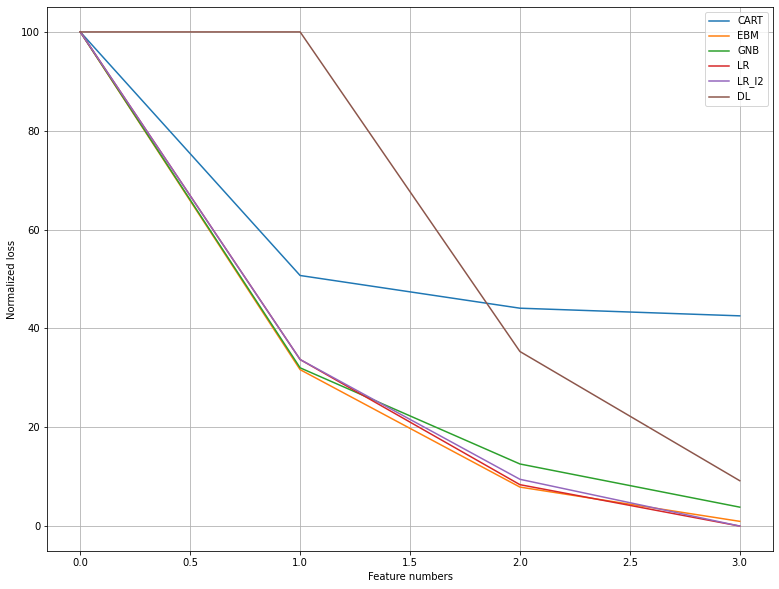

In [22]:
plot_losses(4, diabetes_df_results)

In [23]:
diabetes_auc_loss = calculate_loss_auc(diabetes_df_results, delimiter=4)
diabetes_auc_loss

{'CART': 41.51797304363918,
 'EBM': 22.50766730270872,
 'GNB': 24.127643038190914,
 'LR': 23.02059468025416,
 'LR_l2': 23.295238497053944,
 'DL': 47.47935432224915}

## 7. German dataset

In [24]:
german_data_results = calculate_losses(6)
german_df_results = pd.DataFrame(german_data_results)
german_df_results

FileNotFoundError: [Errno 2] No such file or directory: '../test_results/feature_density/GNB_german_0.csv'